In [90]:
import pandas as pd

import os
print(os.getcwd())

C:\Users\oba032\ExportV2\data


In [92]:
with open('HealthAutoExport-2024-12-21-2025-03-21.csv', 'r') as file:
    for i in range(50):
        print(file.readline())

Date;Active Energy (kcal);Apple Exercise Time (min);Apple Move Time (min);Apple Stand Hour (hours);Headphone Audio Exposure (dBASPL);Heart Rate [Min] (bpm);Heart Rate [Max] (bpm);Heart Rate [Avg] (bpm);Heart Rate Variability (ms);Respiratory Rate (count/min);Resting Energy (kJ);Resting Heart Rate (bpm);Sleep Analysis [Asleep] (hr);Sleep Analysis [In Bed] (hr);Sleep Analysis [Core] (hr);Sleep Analysis [Deep] (hr);Sleep Analysis [REM] (hr);Sleep Analysis [Awake] (hr);Step Count (steps);Walking Heart Rate Average (bpm);Walking Speed (km/hr);Walking Step Length (cm) 

21.12.2024 00:00;;;;;55.57;;;;;;7752;;;;;;;;2180;;mar.57;59.35

22.12.2024 00:00;;;;;52.99;;;;;;7982;;;;;;;;1891;;03.jul;60.55

23.12.2024 00:00;;;;;55.83;;;;;;8017;;;;;;;;3366;;mar.53;59.18

24.12.2024 00:00;17868;;;;48.48;61;72;68.22;56.86;;6598;;;;;;;;1389;;mar.44;56.6

25.12.2024 00:00;368.07;9;;12;48.81;52;110;71.82;49.77;14.48;9168;63;2.5833333333333335;0.0;3.224999999999999;0.475;0.45;0.016666666666666666;2753;91.5;mar

In [94]:
df = pd.read_csv('HealthAutoExport-2024-12-21-2025-03-21.csv', sep=';')
print(df.head())

               Date  Active Energy (kcal)  Apple Exercise Time (min)  \
0  21.12.2024 00:00                   NaN                        NaN   
1  22.12.2024 00:00                   NaN                        NaN   
2  23.12.2024 00:00                   NaN                        NaN   
3  24.12.2024 00:00              17868.00                        NaN   
4  25.12.2024 00:00                368.07                        9.0   

   Apple Move Time (min)  Apple Stand Hour (hours)  \
0                    NaN                       NaN   
1                    NaN                       NaN   
2                    NaN                       NaN   
3                    NaN                       NaN   
4                    NaN                      12.0   

   Headphone Audio Exposure (dBASPL)  Heart Rate [Min] (bpm)  \
0                              55.57                     NaN   
1                              52.99                     NaN   
2                              55.83              

In [96]:
print(df.columns)
print(df.dtypes)
print(df.describe())

Index(['Date', 'Active Energy (kcal)', 'Apple Exercise Time (min)',
       'Apple Move Time (min)', 'Apple Stand Hour (hours)',
       'Headphone Audio Exposure (dBASPL)', 'Heart Rate [Min] (bpm)',
       'Heart Rate [Max] (bpm)', 'Heart Rate [Avg] (bpm)',
       'Heart Rate Variability (ms)', 'Respiratory Rate (count/min)',
       'Resting Energy (kJ)', 'Resting Heart Rate (bpm)',
       'Sleep Analysis [Asleep] (hr)', 'Sleep Analysis [In Bed] (hr)',
       'Sleep Analysis [Core] (hr)', 'Sleep Analysis [Deep] (hr)',
       'Sleep Analysis [REM] (hr)', 'Sleep Analysis [Awake] (hr)',
       'Step Count (steps)', 'Walking Heart Rate Average (bpm)',
       'Walking Speed (km/hr)', 'Walking Step Length (cm) '],
      dtype='object')
Date                                  object
Active Energy (kcal)                 float64
Apple Exercise Time (min)            float64
Apple Move Time (min)                float64
Apple Stand Hour (hours)             float64
Headphone Audio Exposure (dBASPL)   

In [141]:
# Ensure the 'Resting Energy (kJ)' column is numeric (convert if necessary)
df['Resting Energy (kJ)'] = pd.to_numeric(df['Resting Energy (kJ)'], errors='coerce')

# Convert 'Resting Energy (kJ)' to 'Resting Energy (kcal)'
df['Resting Energy (kcal)'] = df['Resting Energy (kJ)'] / 4.184

# Now, display the dataframe to check if the new column exists
print(df[['Resting Energy (kJ)', 'Resting Energy (kcal)']])

    Resting Energy (kJ)  Resting Energy (kcal)
0                7752.0            1852.772467
1                7982.0            1907.743786
2                8017.0            1916.108987
3                6598.0            1576.959847
4                9168.0            2191.204589
..                  ...                    ...
86               1682.0             402.007648
87               9643.0            2304.732314
88               9697.0            2317.638623
89               9385.0            2243.068834
90               5940.0            1419.694073

[91 rows x 2 columns]


In [143]:
cols_to_numeric = [
    'Sleep Analysis [Asleep] (hr)',
    'Sleep Analysis [Core] (hr)',
    'Sleep Analysis [REM] (hr)'
]
print(cols_to_numeric)

['Sleep Analysis [Asleep] (hr)', 'Sleep Analysis [Core] (hr)', 'Sleep Analysis [REM] (hr)']


In [184]:
grouped = df.groupby('Date').agg({
    'Active Energy (kcal)': 'sum',
    'Apple Stand Hour (hours)': 'sum',
    'Heart Rate [Min] (bpm)': 'sum',
    'Heart Rate [Max] (bpm)': 'sum',
    'Heart Rate [Avg] (bpm)': 'sum',
    'Resting Energy (kcal)': 'sum',
    'Resting Heart Rate (bpm)': 'sum',
    'Sleep Analysis [Asleep] (hr)': 'sum',
    'Sleep Analysis [In Bed] (hr)': 'sum',
    'Sleep Analysis [Core] (hr)': 'sum',
    'Sleep Analysis [Deep] (hr)': 'sum',
    'Sleep Analysis [REM] (hr)': 'sum',
    'Sleep Analysis [Awake] (hr)': 'sum',
    'Step Count (steps)': 'sum',
    'Walking Heart Rate Average (bpm)': 'sum'
}).reset_index()

# Ensure 'Date' remains an object (if it's not already)
grouped['Date'] = grouped['Date'].astype(str)

# Show the result
print(grouped)

                Date  Active Energy (kcal)  Apple Stand Hour (hours)  \
0   01.01.2025 00:00                335.65                       8.0   
1   01.02.2025 00:00                190.37                       7.0   
2   01.03.2025 00:00                678.91                       9.0   
3   02.01.2025 00:00                551.25                      14.0   
4   02.02.2025 00:00                  0.00                       0.0   
..               ...                   ...                       ...   
86  29.12.2024 00:00                954.91                      13.0   
87  30.01.2025 00:00                979.13                      14.0   
88  30.12.2024 00:00                486.41                      14.0   
89  31.01.2025 00:00                486.41                      13.0   
90  31.12.2024 00:00                669.85                      13.0   

    Heart Rate [Min] (bpm)  Heart Rate [Max] (bpm)  Heart Rate [Avg] (bpm)  \
0                     59.0                   156.0       

In [186]:
list_of_days = grouped.to_dict(orient='records')

print(list_of_days)

[{'Date': '01.01.2025 00:00', 'Active Energy (kcal)': 335.65, 'Apple Stand Hour (hours)': 8.0, 'Heart Rate [Min] (bpm)': 59.0, 'Heart Rate [Max] (bpm)': 156.0, 'Heart Rate [Avg] (bpm)': 88.06, 'Resting Energy (kcal)': 2086.759082217973, 'Resting Heart Rate (bpm)': 68.0, 'Sleep Analysis [Asleep] (hr)': 0, 'Sleep Analysis [In Bed] (hr)': 0.0, 'Sleep Analysis [Core] (hr)': 0, 'Sleep Analysis [Deep] (hr)': 0.0, 'Sleep Analysis [REM] (hr)': 0, 'Sleep Analysis [Awake] (hr)': 0.0, 'Step Count (steps)': 4207, 'Walking Heart Rate Average (bpm)': 87.0}, {'Date': '01.02.2025 00:00', 'Active Energy (kcal)': 190.37, 'Apple Stand Hour (hours)': 7.0, 'Heart Rate [Min] (bpm)': 49.0, 'Heart Rate [Max] (bpm)': 92.0, 'Heart Rate [Avg] (bpm)': 62.08, 'Resting Energy (kcal)': 1684.7514340344167, 'Resting Heart Rate (bpm)': 55.0, 'Sleep Analysis [Asleep] (hr)': '0.0', 'Sleep Analysis [In Bed] (hr)': 0.0, 'Sleep Analysis [Core] (hr)': '4.825', 'Sleep Analysis [Deep] (hr)': 0.8416666666666667, 'Sleep Analysis

In [188]:
## Now we can round the values to the nearest 0.1. THis is just to get rid of values with several XXXXX

In [190]:
columns_to_round = [
    'Active Energy (kcal)',
    'Apple Stand Hour (hours)',
    'Heart Rate [Min] (bpm)',
    'Heart Rate [Max] (bpm)',
    'Heart Rate [Avg] (bpm)',
    'Resting Energy (kcal)', 
    'Resting Heart Rate (bpm)',
    'Sleep Analysis [Asleep] (hr)',
    'Sleep Analysis [In Bed] (hr)',
    'Sleep Analysis [Core] (hr)',
    'Sleep Analysis [Deep] (hr)',
    'Sleep Analysis [REM] (hr)',
    'Sleep Analysis [Awake] (hr)',
    'Step Count (steps)',
    'Walking Heart Rate Average (bpm)'
]

# Apply rounding to the relevant columns in the grouped dataframe
grouped[columns_to_round] = grouped[columns_to_round].round(1)

# Display the result
print(grouped)


                Date  Active Energy (kcal)  Apple Stand Hour (hours)  \
0   01.01.2025 00:00                 335.6                       8.0   
1   01.02.2025 00:00                 190.4                       7.0   
2   01.03.2025 00:00                 678.9                       9.0   
3   02.01.2025 00:00                 551.2                      14.0   
4   02.02.2025 00:00                   0.0                       0.0   
..               ...                   ...                       ...   
86  29.12.2024 00:00                 954.9                      13.0   
87  30.01.2025 00:00                 979.1                      14.0   
88  30.12.2024 00:00                 486.4                      14.0   
89  31.01.2025 00:00                 486.4                      13.0   
90  31.12.2024 00:00                 669.8                      13.0   

    Heart Rate [Min] (bpm)  Heart Rate [Max] (bpm)  Heart Rate [Avg] (bpm)  \
0                     59.0                   156.0       

In [192]:
## And just to simplify sleep we can create a single variable containing all the sleep values.

## Since we are just interested in the amount of sleep XXXX

In [194]:
# Columns to sum for total sleep
sleep_columns = [
    'Sleep Analysis [Asleep] (hr)', 
    'Sleep Analysis [In Bed] (hr)', 
    'Sleep Analysis [Core] (hr)', 
    'Sleep Analysis [Deep] (hr)', 
    'Sleep Analysis [REM] (hr)', 
    'Sleep Analysis [Awake] (hr)'
]

# Convert the necessary columns to numeric, coercing errors to NaN
grouped[sleep_columns] = grouped[sleep_columns].apply(pd.to_numeric, errors='coerce')

# Add a new column 'total sleep' by summing the relevant sleep-related columns
grouped['total sleep'] = grouped[sleep_columns].sum(axis=1)

# Drop the original sleep-related columns as you only want 'total sleep'
grouped.drop(columns=sleep_columns, inplace=True)

# Display the updated dataframe
print(grouped)


                Date  Active Energy (kcal)  Apple Stand Hour (hours)  \
0   01.01.2025 00:00                 335.6                       8.0   
1   01.02.2025 00:00                 190.4                       7.0   
2   01.03.2025 00:00                 678.9                       9.0   
3   02.01.2025 00:00                 551.2                      14.0   
4   02.02.2025 00:00                   0.0                       0.0   
..               ...                   ...                       ...   
86  29.12.2024 00:00                 954.9                      13.0   
87  30.01.2025 00:00                 979.1                      14.0   
88  30.12.2024 00:00                 486.4                      14.0   
89  31.01.2025 00:00                 486.4                      13.0   
90  31.12.2024 00:00                 669.8                      13.0   

    Heart Rate [Min] (bpm)  Heart Rate [Max] (bpm)  Heart Rate [Avg] (bpm)  \
0                     59.0                   156.0       

In [196]:
# Show the first few rows with the index
print(grouped.head())


               Date  Active Energy (kcal)  Apple Stand Hour (hours)  \
0  01.01.2025 00:00                 335.6                       8.0   
1  01.02.2025 00:00                 190.4                       7.0   
2  01.03.2025 00:00                 678.9                       9.0   
3  02.01.2025 00:00                 551.2                      14.0   
4  02.02.2025 00:00                   0.0                       0.0   

   Heart Rate [Min] (bpm)  Heart Rate [Max] (bpm)  Heart Rate [Avg] (bpm)  \
0                    59.0                   156.0                    88.1   
1                    49.0                    92.0                    62.1   
2                    48.0                   163.0                    81.3   
3                    48.0                   111.0                    73.1   
4                     0.0                     0.0                     0.0   

   Resting Energy (kcal)  Resting Heart Rate (bpm)  Step Count (steps)  \
0                 2086.8            

In [198]:
# List of columns to check for missing values
columns_to_check = [
    'Active Energy (kcal)',
    'Apple Stand Hour (hours)',
    'Heart Rate [Min] (bpm)',
    'Heart Rate [Max] (bpm)',
    'Heart Rate [Avg] (bpm)',
    'Resting Energy (kcal)',
    'Resting Heart Rate (bpm)',
    'Step Count (steps)',
    'Walking Heart Rate Average (bpm)',
    'total sleep'
]

# Drop rows where any value in the specified columns is missing
grouped_cleaned = grouped.dropna(subset=columns_to_check)

# Display the cleaned DataFrame
print(grouped_cleaned)

                Date  Active Energy (kcal)  Apple Stand Hour (hours)  \
0   01.01.2025 00:00                 335.6                       8.0   
1   01.02.2025 00:00                 190.4                       7.0   
2   01.03.2025 00:00                 678.9                       9.0   
3   02.01.2025 00:00                 551.2                      14.0   
4   02.02.2025 00:00                   0.0                       0.0   
..               ...                   ...                       ...   
86  29.12.2024 00:00                 954.9                      13.0   
87  30.01.2025 00:00                 979.1                      14.0   
88  30.12.2024 00:00                 486.4                      14.0   
89  31.01.2025 00:00                 486.4                      13.0   
90  31.12.2024 00:00                 669.8                      13.0   

    Heart Rate [Min] (bpm)  Heart Rate [Max] (bpm)  Heart Rate [Avg] (bpm)  \
0                     59.0                   156.0       

In [214]:
correlation_matrix = grouped.drop(columns=['Date']).corr()

active_energy_corr = correlation_matrix['Active Energy (kcal)'].sort_values(ascending=False)

print(active_energy_corr)

Active Energy (kcal)                1.000000
Heart Rate [Min] (bpm)              0.181505
Heart Rate [Avg] (bpm)              0.116642
Heart Rate [Max] (bpm)              0.019604
Resting Energy (kcal)              -0.027525
Step Count (steps)                 -0.040204
Walking Heart Rate Average (bpm)   -0.051901
total sleep                        -0.111856
Apple Stand Hour (hours)           -0.113451
Resting Heart Rate (bpm)           -0.240865
Name: Active Energy (kcal), dtype: float64


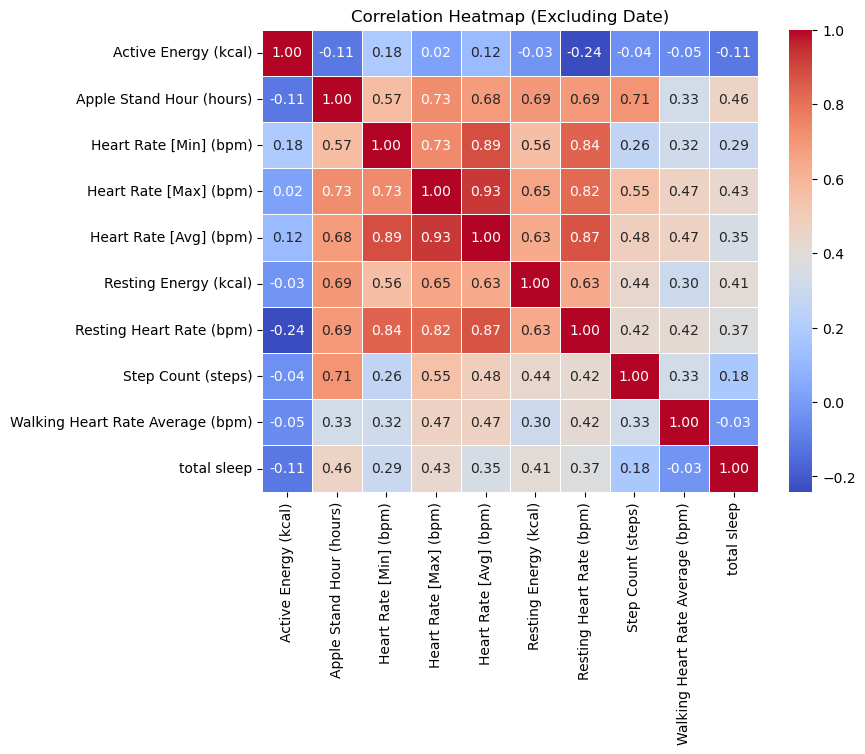

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Date)")
plt.show()


C:\Users\oba032\AppData\Local\Temp\ipykernel_18548\2938318341.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations, y=variables, palette=["red" if c < 0 else "blue" for c in correlations], orient='h')


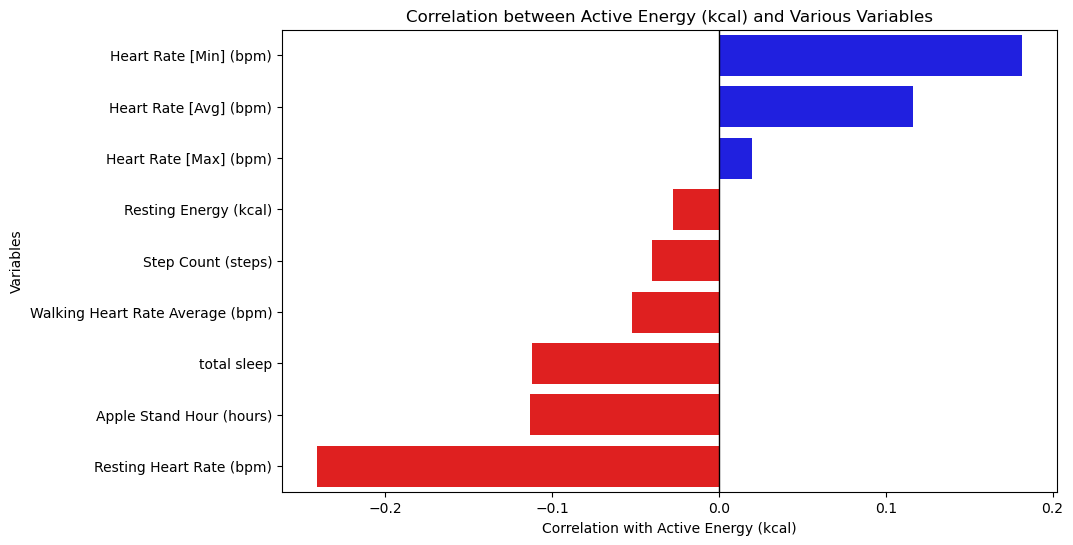

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated variables and their correlation values
variables = [
    "Heart Rate [Min] (bpm)", 
    "Heart Rate [Avg] (bpm)", 
    "Heart Rate [Max] (bpm)", 
    "Resting Energy (kcal)", 
    "Step Count (steps)", 
    "Walking Heart Rate Average (bpm)", 
    "total sleep", 
    "Apple Stand Hour (hours)", 
    "Resting Heart Rate (bpm)"
]

correlations = [
    0.181505, 
    0.116642, 
    0.019604, 
    -0.027525, 
    -0.040204, 
    -0.051901, 
    -0.111856, 
    -0.113451, 
    -0.240865
]

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations, y=variables, palette=["red" if c < 0 else "blue" for c in correlations], orient='h')

# Adding labels and title
plt.xlabel("Correlation with Active Energy (kcal)")
plt.ylabel("Variables")
plt.title("Correlation between Active Energy (kcal) and Various Variables")
plt.axvline(x=0, color='black', linewidth=1)

# Show the plot
plt.show()


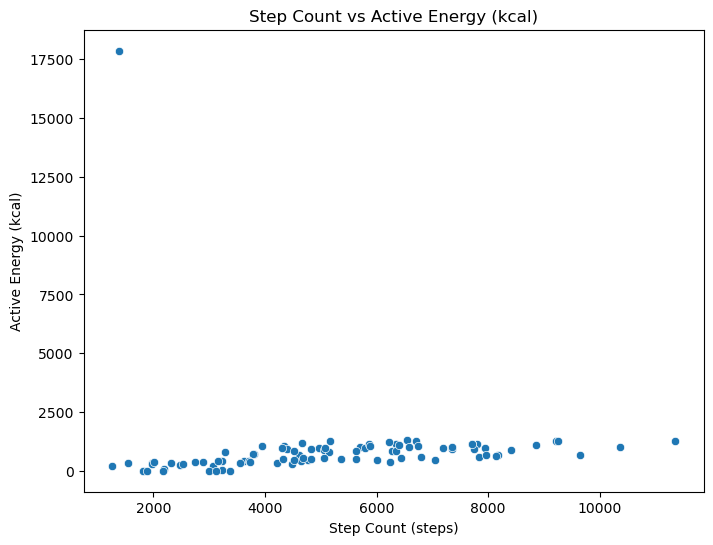

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between Step Count and Active Energy (kcal)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=grouped['Step Count (steps)'], y=grouped['Active Energy (kcal)'])
plt.xlabel('Step Count (steps)')
plt.ylabel('Active Energy (kcal)')
plt.title('Step Count vs Active Energy (kcal)')
plt.show()

In [225]:
# Remove rows where Active Energy (kcal) is above a threshold (e.g., 17,500 kcal)
filtered_grouped = grouped[grouped['Active Energy (kcal)'] <= 8000]


In [227]:
# Calculate the correlation matrix, excluding the 'Date' column
correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Sort the correlation values for 'Active Energy (kcal)' in descending order
active_energy_corr = correlation_matrix['Active Energy (kcal)'].sort_values(ascending=False)

# Print the sorted correlation values
print(active_energy_corr)


Active Energy (kcal)                1.000000
Heart Rate [Max] (bpm)              0.822194
Heart Rate [Avg] (bpm)              0.754300
Apple Stand Hour (hours)            0.692480
Step Count (steps)                  0.688180
Resting Energy (kcal)               0.537350
Resting Heart Rate (bpm)            0.525837
Heart Rate [Min] (bpm)              0.437479
Walking Heart Rate Average (bpm)    0.379192
total sleep                         0.322012
Name: Active Energy (kcal), dtype: float64


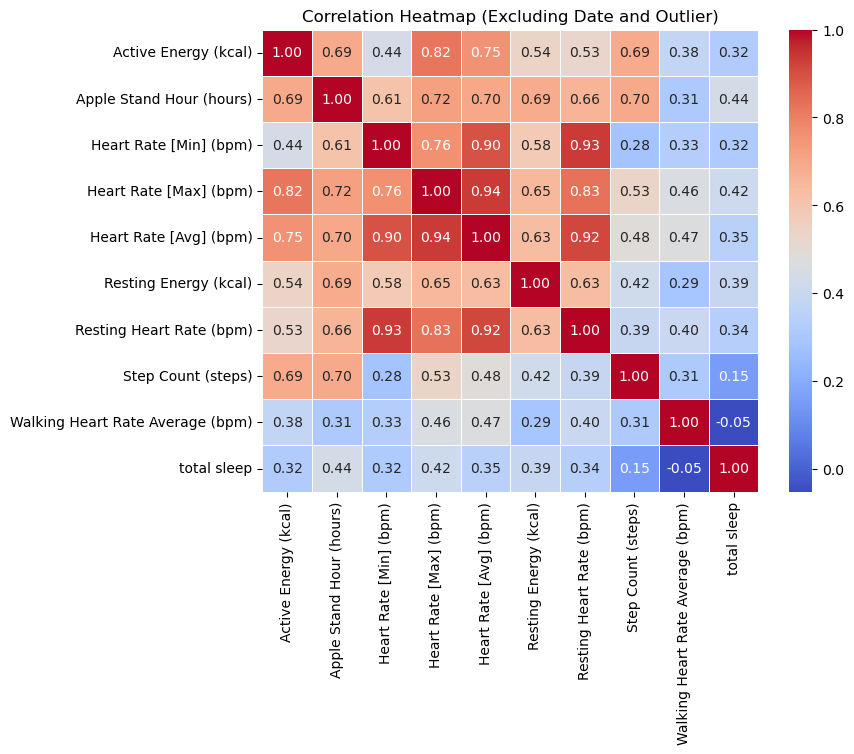

In [229]:
correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Date and Outlier)")
plt.show()

C:\Users\oba032\AppData\Local\Temp\ipykernel_18548\730689431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')


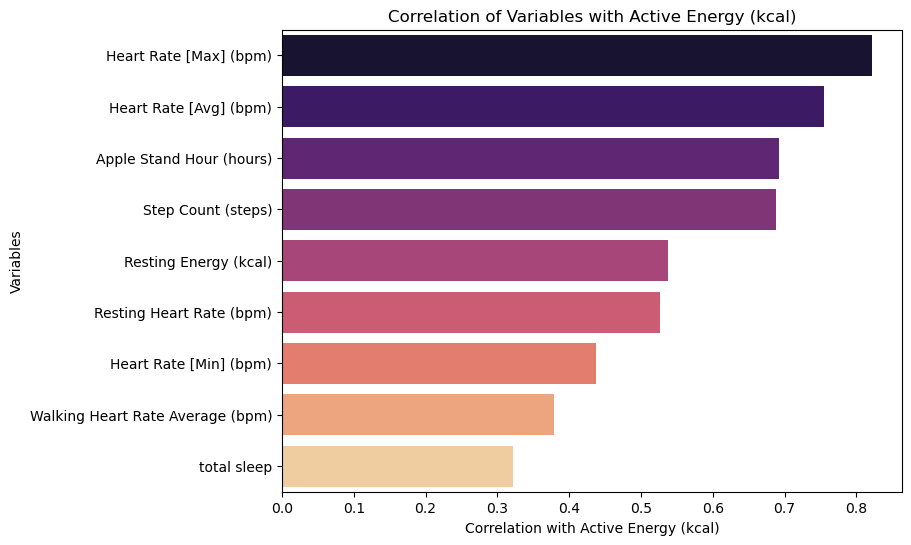

In [279]:
correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 3: Extract the correlation values with 'Active Energy (kcal)'
active_energy_corr = correlation_matrix['Active Energy (kcal)'].sort_values(ascending=False)

# Step 4: Remove the 'Active Energy (kcal)' variable from the correlation results
active_energy_corr = active_energy_corr.drop('Active Energy (kcal)')

# Step 5: Plot the horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')

# Adding labels and title
plt.xlabel("Correlation with Active Energy (kcal)")
plt.ylabel("Variables")
plt.title("Correlation of Variables with Active Energy (kcal)")

plt.show()

C:\Users\oba032\AppData\Local\Temp\ipykernel_18548\3097312485.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')


NameError: name 'ax' is not defined

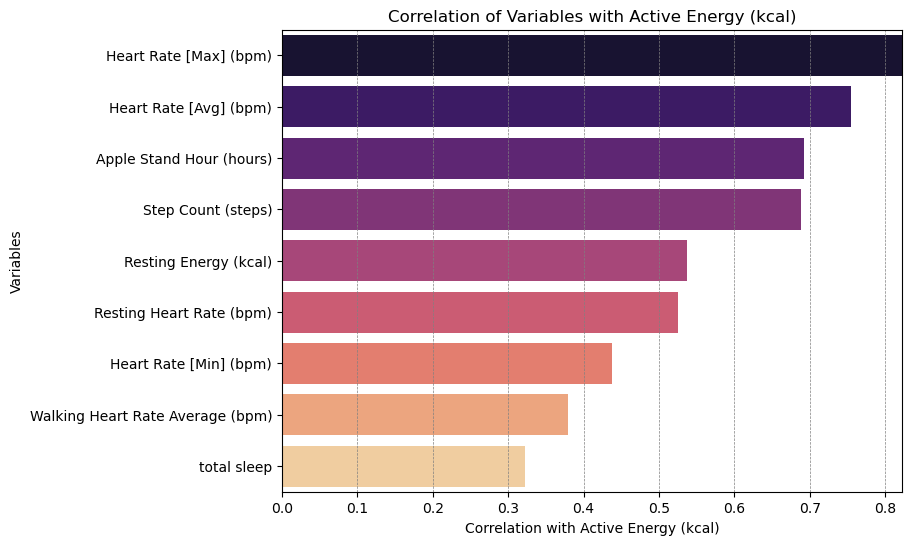

In [299]:
correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 3: Extract the correlation values with 'Active Energy (kcal)'
active_energy_corr = correlation_matrix['Active Energy (kcal)'].sort_values(ascending=False)

# Step 4: Remove the 'Active Energy (kcal)' variable from the correlation results
active_energy_corr = active_energy_corr.drop('Active Energy (kcal)')

# Step 5: Plot the horizontal bar plot
plt.figure(figsize=(8, 6), facecolor='white')
sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')

# Adding a slight grey grid to the plot
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='grey')

plt.xlim(0, active_energy_corr.max())  # This adds a small buffer above the maximum value

# Adding labels and title
plt.xlabel("Correlation with Active Energy (kcal)")
plt.ylabel("Variables")
plt.title("Correlation of Variables with Active Energy (kcal)")

for i, (variable, corr_value) in enumerate(active_energy_corr.items()):
    ax.text(corr_value + 0.05, i, f'r = {corr_value:.2f}', color='black', va='center', ha='left', fontweight='bold')

plt.show()

In [269]:
import scipy.stats as stats
import pandas as pd

# Assuming you already have 'filtered_grouped' dataset without outliers

# Step 1: Calculate the correlation matrix, excluding the 'Date' column
correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 2: Initialize an empty list to store p-values and correlations
significant_correlations = []

# Step 3: Calculate p-values and filter for significant correlations (p-value < 0.05)
for var1 in correlation_matrix.columns:
    for var2 in correlation_matrix.columns:
        if var1 != var2:  # Skip self-correlation
            # Calculate the Pearson correlation and p-value
            corr, p_val = stats.pearsonr(filtered_grouped[var1], filtered_grouped[var2])
            
            # Simplify the p-value presentation
            simplified_p_val = "<0.05" if p_val < 0.05 else ">0.05"
            
            # Append to the list of significant correlations with the simplified p-value
            significant_correlations.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Correlation': corr,
                'P-value': simplified_p_val  # Use the simplified p-value here
            })

# Step 4: Convert the significant correlations to a DataFrame for better display
significant_df = pd.DataFrame(significant_correlations)

# Step 5: Display the significant correlations
print(significant_df)


              Variable 1                        Variable 2  Correlation  \
0   Active Energy (kcal)          Apple Stand Hour (hours)     0.692480   
1   Active Energy (kcal)            Heart Rate [Min] (bpm)     0.437479   
2   Active Energy (kcal)            Heart Rate [Max] (bpm)     0.822194   
3   Active Energy (kcal)            Heart Rate [Avg] (bpm)     0.754300   
4   Active Energy (kcal)             Resting Energy (kcal)     0.537350   
..                   ...                               ...          ...   
85           total sleep            Heart Rate [Avg] (bpm)     0.345706   
86           total sleep             Resting Energy (kcal)     0.391162   
87           total sleep          Resting Heart Rate (bpm)     0.338060   
88           total sleep                Step Count (steps)     0.150071   
89           total sleep  Walking Heart Rate Average (bpm)    -0.051903   

   P-value  
0    <0.05  
1    <0.05  
2    <0.05  
3    <0.05  
4    <0.05  
..     ...  
85   <0.

In [277]:
import scipy.stats as stats
import pandas as pd

# Assuming you already have 'filtered_grouped' dataset without outliers

# Step 1: Calculate the correlation matrix, excluding the 'Date' column
correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 2: Initialize empty lists to store significant and non-significant correlations
significant_correlations = []
non_significant_correlations = []

# Step 3: Calculate p-values and filter for significant correlations (p-value < 0.05)
for var1 in correlation_matrix.columns:
    for var2 in correlation_matrix.columns:
        if var1 != var2:  # Skip self-correlation
            # Calculate the Pearson correlation and p-value
            corr, p_val = stats.pearsonr(filtered_grouped[var1], filtered_grouped[var2])
            
            # Simplify the p-value presentation
            if p_val < 0.05:
                simplified_p_val = "<0.05"
                # Append to the list of significant correlations
                significant_correlations.append({
                    'Variable 1': var1,
                    'Variable 2': var2,
                    'Correlation': corr,
                    'P-value': simplified_p_val
                })
            else:
                simplified_p_val = ">0.05"
                # Append to the list of non-significant correlations
                non_significant_correlations.append({
                    'Variable 1': var1,
                    'Variable 2': var2,
                    'Correlation': corr,
                    'P-value': simplified_p_val
                })

# Step 4: Convert the significant correlations to DataFrames for better display
significant_df = pd.DataFrame(significant_correlations)
non_significant_df = pd.DataFrame(non_significant_correlations)

# Step 5: Display the significant correlations
print("Significant Correlations:")
print(significant_df)

# Display the non-significant correlations
print("\nNon-Significant Correlations:")
print(non_significant_df)


Significant Correlations:
              Variable 1                Variable 2  Correlation P-value
0   Active Energy (kcal)  Apple Stand Hour (hours)     0.692480   <0.05
1   Active Energy (kcal)    Heart Rate [Min] (bpm)     0.437479   <0.05
2   Active Energy (kcal)    Heart Rate [Max] (bpm)     0.822194   <0.05
3   Active Energy (kcal)    Heart Rate [Avg] (bpm)     0.754300   <0.05
4   Active Energy (kcal)     Resting Energy (kcal)     0.537350   <0.05
..                   ...                       ...          ...     ...
81           total sleep    Heart Rate [Min] (bpm)     0.317638   <0.05
82           total sleep    Heart Rate [Max] (bpm)     0.415180   <0.05
83           total sleep    Heart Rate [Avg] (bpm)     0.345706   <0.05
84           total sleep     Resting Energy (kcal)     0.391162   <0.05
85           total sleep  Resting Heart Rate (bpm)     0.338060   <0.05

[86 rows x 4 columns]

Non-Significant Correlations:
                         Variable 1                     

C:\Users\oba032\AppData\Local\Temp\ipykernel_18548\1824739836.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')


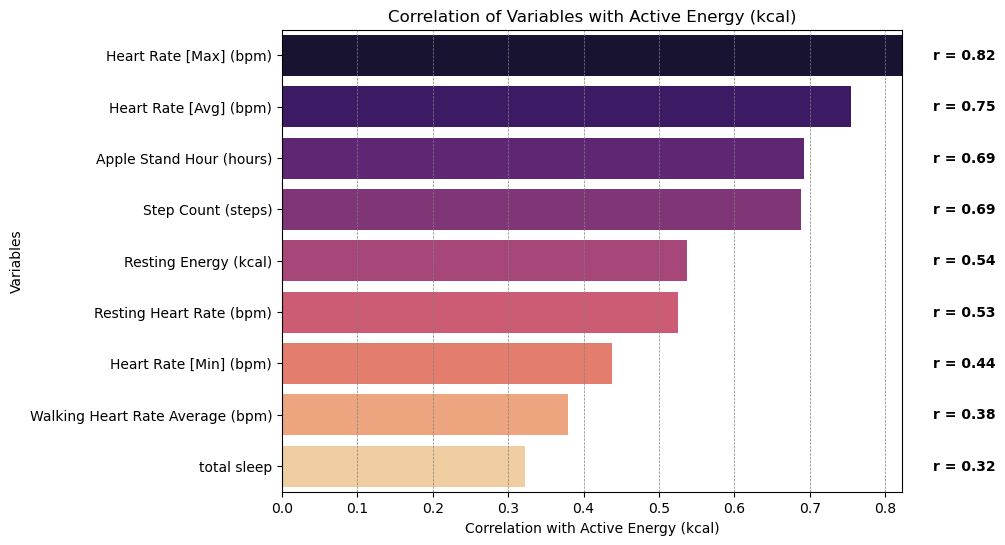

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 3: Extract the correlation values with 'Active Energy (kcal)'
active_energy_corr = correlation_matrix['Active Energy (kcal)'].sort_values(ascending=False)

# Step 4: Remove the 'Active Energy (kcal)' variable from the correlation results
active_energy_corr = active_energy_corr.drop('Active Energy (kcal)')

# Step 5: Plot the horizontal bar plot
plt.figure(figsize=(8, 6), facecolor='white')

# Create the bar plot and capture the axes (ax) object
ax = sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')

# Adding a slight grey grid to the plot
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='grey')

# Manually setting the x-axis limit to match the highest correlation value
plt.xlim(0, active_energy_corr.max())  # This adds a small buffer above the maximum value

# Adding labels and title
plt.xlabel("Correlation with Active Energy (kcal)")
plt.ylabel("Variables")
plt.title("Correlation of Variables with Active Energy (kcal)")

# Add the correlation value as text next to the bars
for i, (variable, corr_value) in enumerate(active_energy_corr.items()):
    # Place text at a fixed position to the right of the plot area
    ax.text(active_energy_corr.max() * 1.05, i, f'r = {corr_value:.2f}', color='black', va='center', ha='left', fontweight='bold')

# Show the plot
plt.show()

C:\Users\oba032\AppData\Local\Temp\ipykernel_18548\2223015929.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')


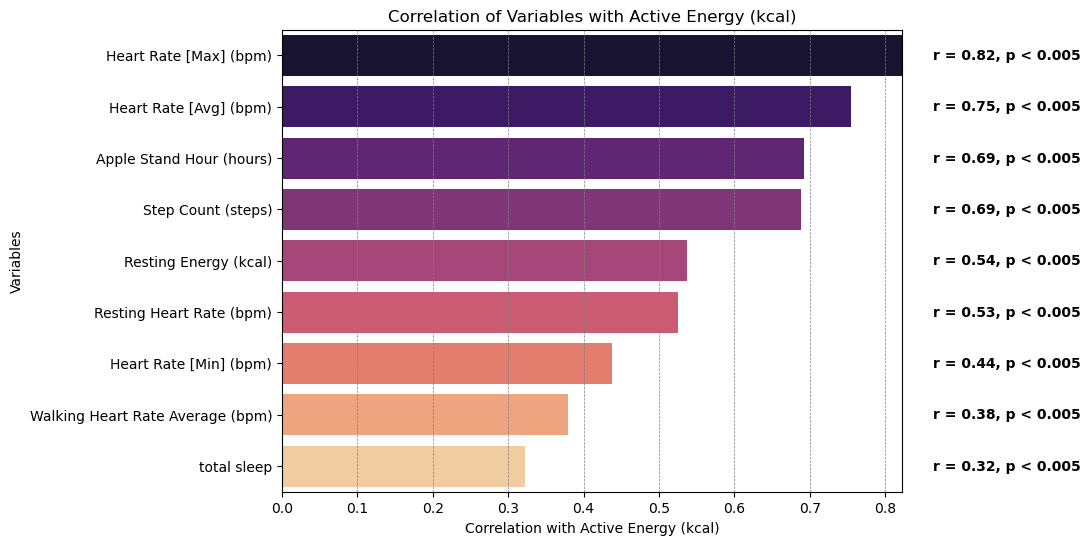

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming filtered_grouped is your dataframe without outliers

correlation_matrix = filtered_grouped.drop(columns=['Date']).corr()

# Step 3: Extract the correlation values with 'Active Energy (kcal)'
active_energy_corr = correlation_matrix['Active Energy (kcal)'].sort_values(ascending=False)

# Step 4: Remove the 'Active Energy (kcal)' variable from the correlation results
active_energy_corr = active_energy_corr.drop('Active Energy (kcal)')

# Calculate p-values for each correlation with Active Energy (kcal)
p_values = {}
for variable in active_energy_corr.index:
    corr, p_val = stats.pearsonr(filtered_grouped['Active Energy (kcal)'], filtered_grouped[variable])
    p_values[variable] = p_val

# Step 5: Plot the horizontal bar plot
plt.figure(figsize=(8, 6), facecolor='white')

# Create the bar plot and capture the axes (ax) object
ax = sns.barplot(x=active_energy_corr, y=active_energy_corr.index, palette="magma", orient='h')

# Adding a slight grey grid to the plot
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, color='grey')

# Manually setting the x-axis limit to match the highest correlation value
plt.xlim(0, active_energy_corr.max())  # This adds a small buffer above the maximum value

# Adding labels and title
plt.xlabel("Correlation with Active Energy (kcal)")
plt.ylabel("Variables")
plt.title("Correlation of Variables with Active Energy (kcal)")

# Adjust text positions outside the figure (beside the whole plot)
for i, (variable, corr_value) in enumerate(active_energy_corr.items()):
    p_val = p_values[variable]
    
    # If the p-value is less than 0.005, display 'p < 0.005'
    if p_val < 0.005:
        p_value_text = f'p < 0.005'
    else:
        p_value_text = f'p = {p_val:.5f}'
    
    # Format the text to show both r and p-value
    ax.text(active_energy_corr.max() * 1.05, i, f'r = {corr_value:.2f}, {p_value_text}', 
            color='black', va='center', ha='left', fontweight='bold')

# Show the plot
plt.show()
